In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from scipy import stats 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../data/preprocessed_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
for col in df.columns : 
    if (df[col].dtype == 'O' or col == 'SeniorCitizen') and (col not in ['customerID']) : 
        print(col , '-->', len(df[col].unique()))

gender --> 2
SeniorCitizen --> 2
Partner --> 2
Dependents --> 2
PhoneService --> 2
MultipleLines --> 3
InternetService --> 3
OnlineSecurity --> 3
OnlineBackup --> 3
DeviceProtection --> 3
TechSupport --> 3
StreamingTV --> 3
StreamingMovies --> 3
Contract --> 3
PaperlessBilling --> 2
PaymentMethod --> 4
Churn --> 2


%CHURN:
No     73.46
Yes    26.54
Name: Churn, dtype: float64


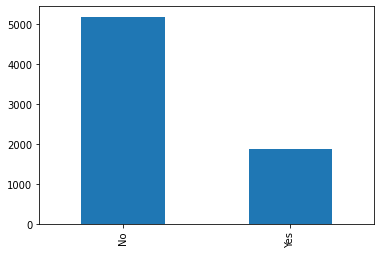

In [3]:
print("="*30)
print("%"+str('Churn').upper()+":")
print(round((df['Churn'].value_counts()/len(df))*100, 2))
print("="*30)
df.Churn.value_counts().plot(kind = 'bar');

In [4]:
def univariate_analysis(kind, feature, dataframe = df, xtitle = None, ytitle = 'Count', title = None) : 
    if kind == 'bar' : 
        print("="*30)
        print("%"+str(feature).upper()+":")
        print(round((dataframe[feature].value_counts()/len(dataframe))*100, 2))
        print("="*30)

        dummy = pd.DataFrame(dataframe.groupby([feature, 'Churn'])['customerID'].count()).reset_index().rename(columns = {'customerID' : 'count'})

        fig = go.Figure(data=[
            go.Bar(
                x=dummy[feature].unique(), 
                y=dummy[dummy.Churn == 'Yes']['count'], 
                text = dummy[dummy.Churn == 'Yes']['count'], 
                marker_color = '#012652', 
                name = 'Yes'),
            go.Bar(
                x=dummy[feature].unique(), 
                y=dummy[dummy.Churn == 'No']['count'], 
                text = dummy[dummy.Churn == 'No']['count'], 
                marker_color = '#0D94FB', 
                name = 'No')
        ])

        fig.update_layout(
            title = title, 
            xaxis_title = xtitle, 
            yaxis_title = ytitle, 
            legend_title = 'Churn'
        )

        fig.show()

In [5]:
for col in df.columns : 
    if (df[col].dtype == 'O' or col == 'SeniorCitizen') and (col not in ['customerID', 'Churn']) : 
        univariate_analysis(kind = 'bar', feature = col, xtitle= col, title=col)

%GENDER:
Male      50.48
Female    49.52
Name: gender, dtype: float64


%SENIORCITIZEN:
0    83.79
1    16.21
Name: SeniorCitizen, dtype: float64


%PARTNER:
No     51.7
Yes    48.3
Name: Partner, dtype: float64


%DEPENDENTS:
No     70.04
Yes    29.96
Name: Dependents, dtype: float64


%PHONESERVICE:
Yes    90.32
No      9.68
Name: PhoneService, dtype: float64


%MULTIPLELINES:
No                  48.13
Yes                 42.18
No phone service     9.68
Name: MultipleLines, dtype: float64


%INTERNETSERVICE:
Fiber optic    43.96
DSL            34.37
No             21.67
Name: InternetService, dtype: float64


%ONLINESECURITY:
No                     49.67
Yes                    28.67
No internet service    21.67
Name: OnlineSecurity, dtype: float64


%ONLINEBACKUP:
No                     43.84
Yes                    34.49
No internet service    21.67
Name: OnlineBackup, dtype: float64


%DEVICEPROTECTION:
No                     43.94
Yes                    34.39
No internet service    21.67
Name: DeviceProtection, dtype: float64


%TECHSUPPORT:
No                     49.31
Yes                    29.02
No internet service    21.67
Name: TechSupport, dtype: float64


%STREAMINGTV:
No                     39.90
Yes                    38.44
No internet service    21.67
Name: StreamingTV, dtype: float64


%STREAMINGMOVIES:
No                     39.54
Yes                    38.79
No internet service    21.67
Name: StreamingMovies, dtype: float64


%CONTRACT:
Month-to-month    55.02
Two year          24.07
One year          20.91
Name: Contract, dtype: float64


%PAPERLESSBILLING:
Yes    59.22
No     40.78
Name: PaperlessBilling, dtype: float64


%PAYMENTMETHOD:
Electronic check             33.58
Mailed check                 22.89
Bank transfer (automatic)    21.92
Credit card (automatic)      21.61
Name: PaymentMethod, dtype: float64


In [6]:
fig = ff.create_distplot([df[df.Churn == 'Yes']['MonthlyCharges'], df[df.Churn == 'No']['MonthlyCharges']], ['Yes', 'No'], bin_size = 5, colors=['#012652', '#0D94FB'])
fig.show()

In [7]:
fig = ff.create_distplot([df[df.Churn == 'Yes']['TotalCharges'], df[df.Churn == 'No']['TotalCharges']], ['Yes', 'No'], bin_size=100, colors=['#012652', '#0D94FB'])
fig.show()

In [34]:
tmp_churn = df[df['Churn'] == 'Yes']
tmp_no_churn = df[df['Churn'] == 'No']

tmp_churn_fiber = tmp_churn[tmp_churn['InternetService'] == 'Fiber optic']
tmp_churn_dsl = tmp_churn[tmp_churn['InternetService'] == 'DSL']
tmp_churn_no = tmp_churn[tmp_churn['InternetService'] == 'No']

tmp_no_churn_fiber = tmp_no_churn[tmp_no_churn['InternetService'] == 'Fiber optic']
tmp_no_churn_dsl = tmp_no_churn[tmp_no_churn['InternetService'] == 'DSL']
tmp_no_churn_no = tmp_no_churn[tmp_no_churn['InternetService'] == 'No']

# Create traces
trace0 = go.Scatter(
    x = tmp_churn_fiber['MonthlyCharges'],
    y = tmp_churn_fiber['TotalCharges'],
    mode = 'markers', opacity=.8,
    name = 'Churn - Fiber', marker=dict(
        color='#012652', symbol='star'
))
trace1 = go.Scatter(
    x = tmp_churn_dsl['MonthlyCharges'],
    y = tmp_churn_dsl['TotalCharges'],
    mode = 'markers', opacity=.8,
    name = 'Churn - DSL', marker=dict(
        color='#012652', symbol='square'
))
trace2 = go.Scatter(
    x = tmp_churn_no['MonthlyCharges'],
    y = tmp_churn_no['TotalCharges'],
    mode = 'markers', opacity=.8,
    name = 'Churn - No', marker=dict(
        color='#012652', symbol='circle'
))

# Create traces
trace3 = go.Scatter(
    x = tmp_no_churn_fiber['MonthlyCharges'],
    y = tmp_no_churn_fiber['TotalCharges'],
    mode = 'markers', opacity=.8,
    name = 'No-Churn-Fiber', marker=dict(
        color='#0D94FB', symbol='star'
))
trace4 = go.Scatter(
    x = tmp_no_churn_dsl['MonthlyCharges'],
    y = tmp_no_churn_dsl['TotalCharges'],
    mode = 'markers', opacity=.8,
    name = 'No-Churn-DSL', marker=dict(
        color='#0D94FB', symbol='square'
))
trace5 = go.Scatter(
    x = tmp_no_churn_no['MonthlyCharges'],
    y = tmp_no_churn_no['TotalCharges'],
    mode = 'markers', opacity=.8,
    name = 'No-Churn-No', marker=dict(
        color='#0D94FB', symbol='circle'
))

layout = dict(title ='Dispersion of Total Charges explained by Monthly Charges by Target',
              xaxis=dict(title='Monthly Charges'), 
              yaxis=dict(title= 'Total Charges'))

fig = go.Figure(data = [trace0, trace3, trace1, trace4, trace2, trace5], layout=layout)
iplot(fig)

We can clearly see a "linear function" where the two features are very correlated and it that make a lot of sense.
I tought that could be interesting if we divide the Total charges by the Monthly Charges and we will get the months till the Churn... It would be very close value of tenure

In [9]:
df['assign_months'] = round(df['TotalCharges'] / df['MonthlyCharges'],0)

In [10]:
print("Comparing Tenure and Assign Months")
pd.concat([df['assign_months'].describe().reset_index(),
           df['tenure'].describe().reset_index()['tenure']], axis=1)

Comparing Tenure and Assign Months


,index,assign_months,tenure
0,count,7043.000000,7043.000000
1,mean,32.439017,32.371149
2,std,24.584305,24.559481
3,min,1.000000,0.000000
4,25%,9.000000,9.000000
5,50%,29.000000,29.000000
6,75%,55.000000,55.000000
7,max,79.000000,72.000000


In [11]:
df.drop('assign_months', axis=1, inplace=True)